In [10]:
import os
import os.path as osp
import neurokit2 as nk
from DatasetLoader.dataset_loader import DatasetLoader
from DatasetLoader.signal_processing import *
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from collections import Counter

In [11]:
dataset_loader = DatasetLoader()
collected_gsr_data, ground_truth = dataset_loader.load_collected_gsr_dataset()

In [12]:
# Get a sample
sample_user = collected_gsr_data['D']
relax_sample = sample_user['D_Relax_09012020_170755_5Hz.csv']
stress_sample = sample_user['D_Task02_09012020_165933_5Hz.csv']

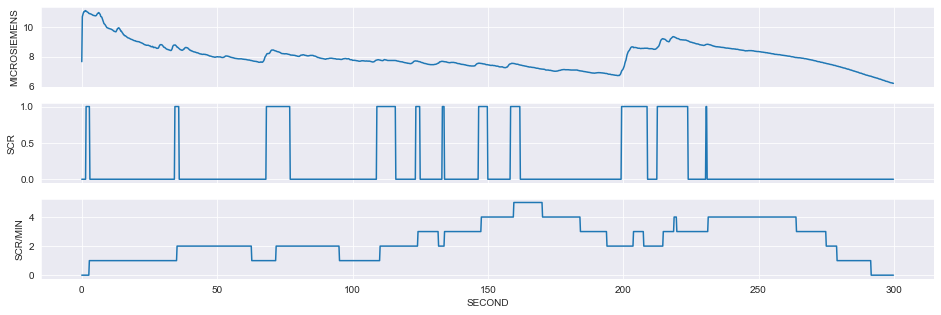

In [13]:
# Visualize stress sample
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(16.0,5.0))
sns.lineplot(x='SECOND', y='MICROSIEMENS', data=stress_sample[['SECOND', 'MICROSIEMENS']], ax=axs[0])
sns.lineplot(x='SECOND', y='SCR', data=stress_sample[['SECOND', 'SCR']], ax=axs[1])
sns.lineplot(x='SECOND', y='SCR/MIN', data=stress_sample[['SECOND', 'SCR/MIN']], ax=axs[2])

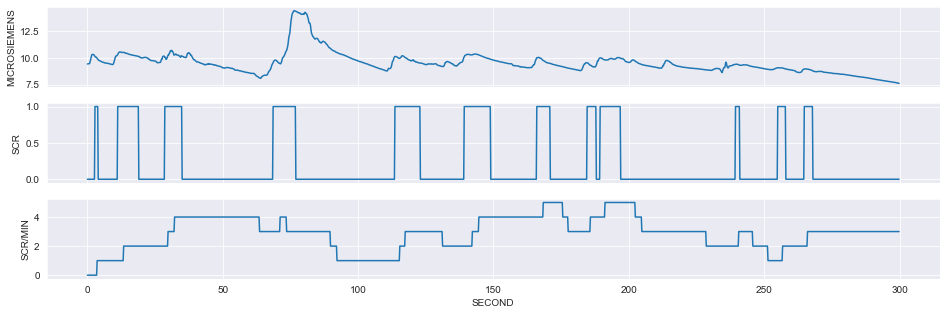

In [14]:
# Visualize relax sample
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(16.0, 5.0))
sns.lineplot(x='SECOND', y='MICROSIEMENS', data=relax_sample[['SECOND', 'MICROSIEMENS']], ax=axs[0])
sns.lineplot(x='SECOND', y='SCR', data=relax_sample[['SECOND', 'SCR']], ax=axs[1])
sns.lineplot(x='SECOND', y='SCR/MIN', data=relax_sample[['SECOND', 'SCR/MIN']], ax=axs[2])

In [15]:
columns = ['SECOND', 'MICROSIEMENS']
agg_stress_sample = aggregate_signal_data(stress_sample[columns], sampling_rate=5)
agg_relax_sample = aggregate_signal_data(relax_sample[columns], sampling_rate=5)

In [7]:
# Visualize stress vs relax sample after aggregation process
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16.0,5.0))
sns.lineplot(x='SECOND', y='MICROSIEMENS', data=agg_stress_sample[['SECOND', 'MICROSIEMENS']], ax=axs[0])
sns.lineplot(x='SECOND', y='MICROSIEMENS', data=agg_relax_sample[['SECOND', 'MICROSIEMENS']], ax=axs[1])

NameError: name 'plt' is not defined

## Intervals division of GSR data visualization

In [8]:
agg_gsr_data = dataset_loader.aggregate_gsr_dataset(collected_gsr_data, selected_columns=['MICROSIEMENS', 'SCR', 'SCR/MIN'])
agg_interval_gsr_data, agg_interval_ground_truth, _ = dataset_loader.divide_into_intervals(agg_gsr_data, ground_truth, 60)

In [9]:
# Visualize the ratio of stress/non-stress samples for general cross-population stress detection model
multi_label_ground_truth = []
detail_label_ground_truth = []
for participant_id, data in agg_interval_ground_truth.items():
    for task_id, interval_data in data.items():
        for data in interval_data:
            _ground_truth = data
            multi_label_gt, detail_label_gt = _ground_truth
            multi_label_ground_truth.append(multi_label_gt)
            detail_label_ground_truth.append(detail_label_gt)
binary_ground_truth = [0 if label < 2 else 1 for label in multi_label_ground_truth]

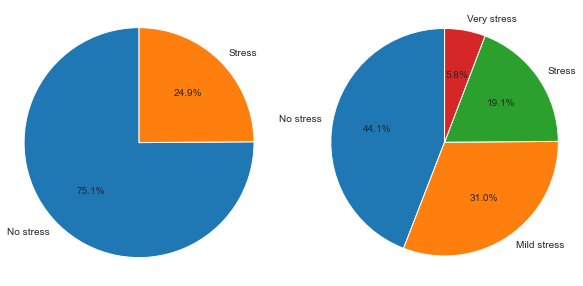

In [10]:
binary_label_cnt = list(Counter(binary_ground_truth).values())
multi_label_cnt = list(Counter(multi_label_ground_truth).values())

labels1 = 'No stress', 'Stress'
labels2 = 'No stress', 'Mild stress', 'Stress', 'Very stress'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(binary_label_cnt, labels=labels1, autopct='%1.1f%%', startangle=90)
ax2.pie(multi_label_cnt, labels=labels2, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax2.axis('equal')
plt.show()

In [14]:
prepared_dataset = dataset_loader.prepare_dataset(agg_gsr_data, ground_truth, selected_columns=['MICROSIEMENS', 'SCR', 'SCR/MIN'])
multi_label_ground_truth = []
detail_label_ground_truth = []
for data in prepared_dataset:
    _ground_truth = data[-1]
    multi_label_gt, detail_label_gt = _ground_truth
    multi_label_ground_truth.append(multi_label_gt)
    detail_label_ground_truth.append(detail_label_gt)
binary_ground_truth = [0 if label < 2 else 1 for label in multi_label_ground_truth]

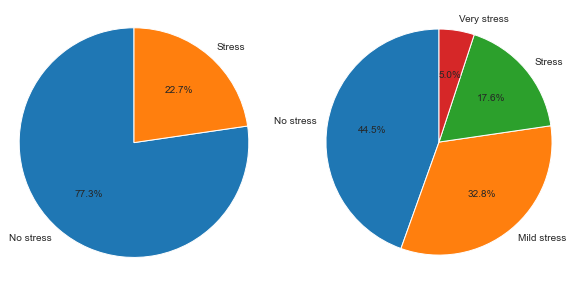

In [15]:
binary_label_cnt = list(Counter(binary_ground_truth).values())
multi_label_cnt = list(Counter(multi_label_ground_truth).values())

labels1 = 'No stress', 'Stress'
labels2 = 'No stress', 'Mild stress', 'Stress', 'Very stress'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(binary_label_cnt, labels=labels1, autopct='%1.1f%%', startangle=90)
ax2.pie(multi_label_cnt, labels=labels2, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax2.axis('equal')
plt.show()